In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from torch import optim
from torch import nn
from kissing_detector import KissingDetector
from data import AudioVideo
from train import train_model, train_kd
from pipeline import BuildDataset
import math
import cv2

In [36]:
data_path_base = '/Users/aziai/Downloads/vtest_new2'
model_name = 'resnet'
num_epochs = 10
feature_extract = True
batch_size = 32

In [37]:
kd, history = train_kd(data_path_base,
                       model_name,
                       num_epochs,
                       feature_extract,
                       batch_size)

Params to update
* combined.weight
* combined.bias
Epoch 0/9
----------
train Loss: 0.7353 F1: 0.5745 Acc: 0.4937
val Loss: 0.6720 F1: 0.6897 Acc: 0.5765

Epoch 1/9
----------
train Loss: 0.6843 F1: 0.5128 Acc: 0.5190
val Loss: 0.7461 F1: 0.4565 Acc: 0.4118

Epoch 2/9
----------
train Loss: 0.6430 F1: 0.5333 Acc: 0.6456
val Loss: 0.6254 F1: 0.7500 Acc: 0.6471

Epoch 3/9
----------
train Loss: 0.5628 F1: 0.8000 Acc: 0.7595
val Loss: 0.4971 F1: 0.9000 Acc: 0.8353

Epoch 4/9
----------
train Loss: 0.5478 F1: 0.7523 Acc: 0.6582
val Loss: 0.5166 F1: 0.8636 Acc: 0.7882

Epoch 5/9
----------
train Loss: 0.4294 F1: 0.9213 Acc: 0.9114
val Loss: 0.7027 F1: 0.4651 Acc: 0.4588

Epoch 6/9
----------
train Loss: 0.4299 F1: 0.7385 Acc: 0.7848
val Loss: 0.6527 F1: 0.6105 Acc: 0.5647

Epoch 7/9
----------
train Loss: 0.3749 F1: 0.9000 Acc: 0.8987
val Loss: 0.4553 F1: 0.8806 Acc: 0.8118

Epoch 8/9
----------
train Loss: 0.3387 F1: 0.9213 Acc: 0.9114
val Loss: 0.4447 F1: 0.8769 Acc: 0.8118

Epoch 9/9
---

In [5]:
datas = [
    ('movies_casino_royale_2006_kissing_1.mp4', 1),
    ('movies_casino_royale_2006_kissing_2.mp4', 1),
    ('movies_casino_royale_2006_kissing_3.mp4', 1),
    ('movies_casino_royale_2006_not_1.mp4', 0),
    ('movies_casino_royale_2006_not_2.mp4', 0),
    ('movies_casino_royale_2006_not_3.mp4', 0),
    
    ('movies_goldeneye_1995_kissing_1.mp4', 1),
    ('movies_goldeneye_1995_kissing_2.mp4', 1),
    ('movies_goldeneye_1995_kissing_3.mp4', 1),
    ('movies_goldeneye_1995_not_1.mp4', 0),
    ('movies_goldeneye_1995_not_2.mp4', 0),
    ('movies_goldeneye_1995_not_3.mp4', 0),
]

In [8]:
b = BuildDataset('/Users/aziai/Downloads/',
                datas,
                '/Users/aziai/Downloads/vtest_new2')

In [9]:
b.build_dataset()

Something went wrong!


MoviePy - Writing audio in %s
MoviePy - Done.


Something went wrong!


chunk:  21%|██        | 280/1346 [00:00<00:00, 2798.60it/s, now=None]

MoviePy - Writing audio in %s


MoviePy - Done.
Something went wrong!


MoviePy - Writing audio in %s
MoviePy - Done.


Something went wrong!


MoviePy - Writing audio in %s
MoviePy - Done.


Something went wrong!


MoviePy - Writing audio in %s
MoviePy - Done.


Something went wrong!


MoviePy - Writing audio in %s
MoviePy - Done.


Something went wrong!


MoviePy - Writing audio in %s
MoviePy - Done.


chunk:   0%|          | 0/243 [00:00<?, ?it/s, now=None]

Something went wrong!
MoviePy - Writing audio in %s


MoviePy - Done.
Something went wrong!


MoviePy - Writing audio in %s
MoviePy - Done.


Something went wrong!
MoviePy - Writing audio in %s


MoviePy - Done.
Something went wrong!
MoviePy - Writing audio in %s


MoviePy - Done.
Something went wrong!


MoviePy - Writing audio in %s
MoviePy - Done.


In [10]:
av = AudioVideo('/Users/aziai/Downloads/vtest_new2/val')

In [11]:
len(av)

85

In [12]:
len(av)

85

In [13]:
av[0][1].shape

torch.Size([3, 224, 224])

In [15]:
av[0][0].shape

torch.Size([1, 96, 64])

In [24]:
import pandas as pd

In [27]:
pd.Series([av[i][2] for i in range(len(av)) ]).value_counts(normalize=True)

1    0.776471
0    0.223529
dtype: float64

In [30]:
labels = torch.tensor([0, 0, 1])
preds = torch.tensor([0, 1, 1])

In [35]:
torch.sum((labels != preds)[labels == 1])

tensor(0)

In [33]:
torch.tensor([0, 0, 1]) = torch.tensor([])

RuntimeError: The size of tensor a (3) must match the size of tensor b (0) at non-singleton dimension 0

In [12]:
from torchvision import transforms

In [52]:
q = transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [14]:
# %matplotlib inline

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
a = av[0][1].data.numpy()

In [17]:
a.shape

(3, 1920, 798)

In [18]:
from PIL import Image
im = Image.fromarray(av[0][1].permute((2, 1, 0)).data.numpy(), mode='RGB')

In [19]:
np.asarray(im).shape

(798, 1920, 3)

In [20]:
# plt.imshow(np.asarray(im))

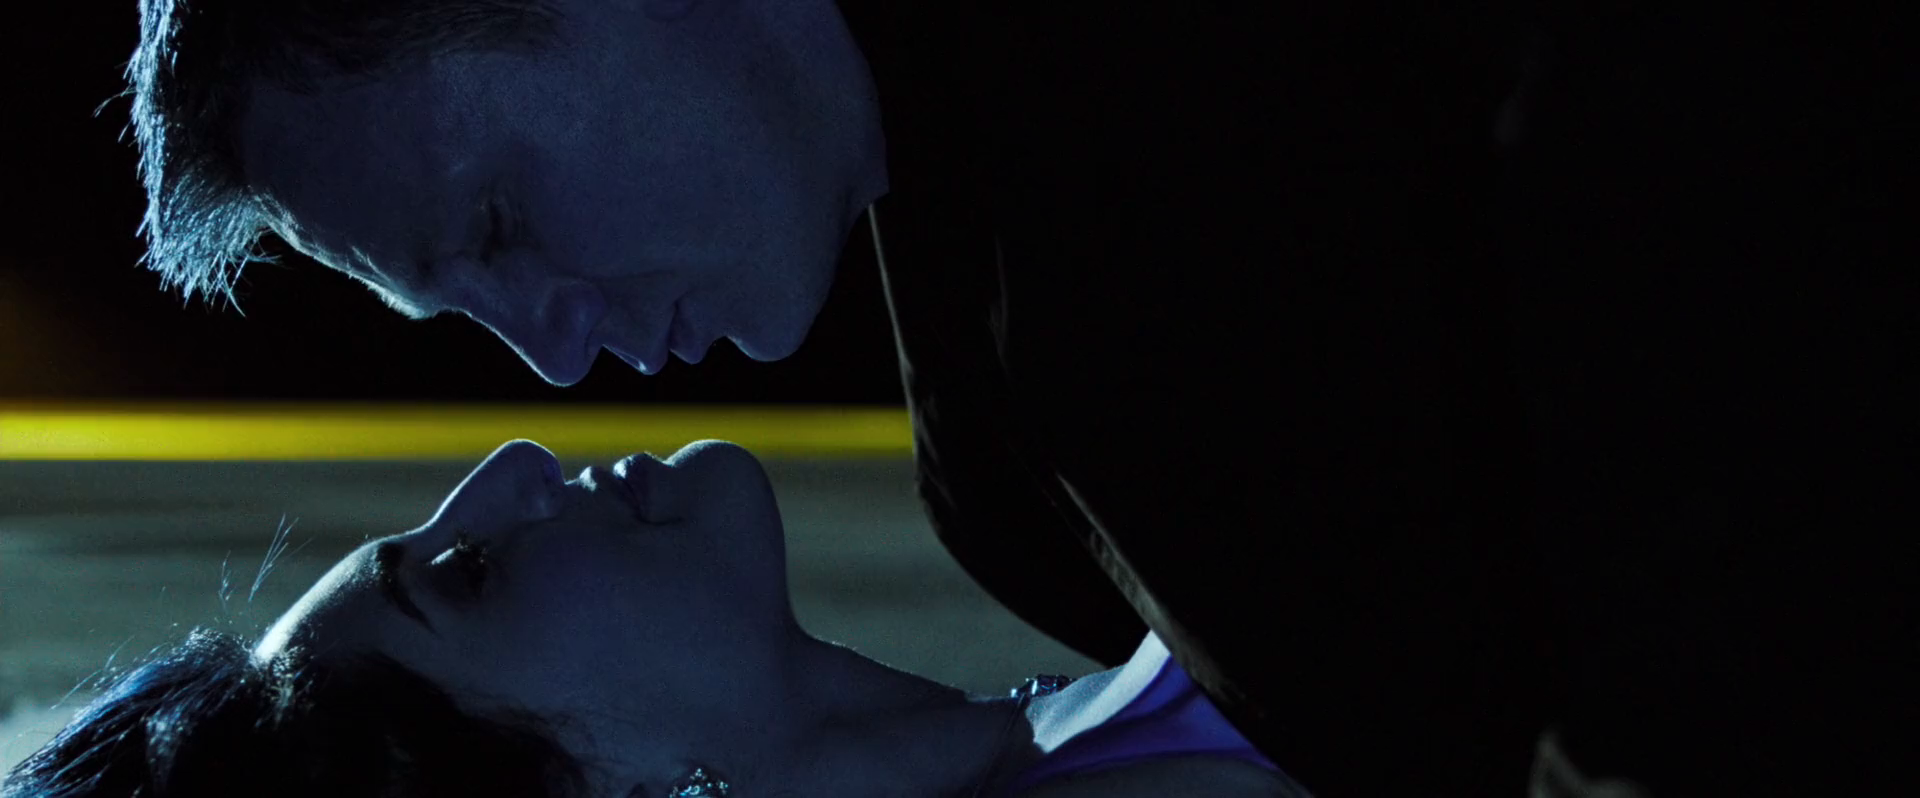

In [53]:
im

In [57]:
q(im)

tensor([[[-2.0837, -2.0837, -2.0837,  ..., -2.0494, -2.0494, -2.0494],
         [-2.0665, -2.0665, -2.0837,  ..., -2.0323, -2.0323, -2.0323],
         [-2.0665, -2.0665, -2.0837,  ..., -2.0323, -2.0323, -2.0323],
         ...,
         [-2.0494, -2.0494, -2.0665,  ..., -1.3815, -1.3473, -1.3130],
         [-2.0323, -2.0494, -2.0665,  ..., -1.3815, -1.3644, -1.3473],
         [-2.0323, -2.0494, -2.0665,  ..., -1.3644, -1.3644, -1.3473]],

        [[-2.0007, -2.0007, -2.0007,  ..., -2.0182, -2.0182, -2.0182],
         [-1.9832, -1.9832, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         [-1.9832, -1.9832, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         ...,
         [-2.0182, -2.0007, -1.9832,  ..., -0.8978, -0.8627, -0.8277],
         [-2.0007, -2.0007, -1.9832,  ..., -0.8803, -0.8627, -0.8277],
         [-2.0007, -1.9832, -1.9832,  ..., -0.8452, -0.8452, -0.8277]],

        [[-1.7696, -1.7696, -1.7696,  ..., -1.7696, -1.7696, -1.7696],
         [-1.7522, -1.7522, -1.7696,  ..., -1

In [ ]:
plt.imshow(im)

In [34]:
q

Compose(
    RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
    RandomHorizontalFlip(p=0.5)
    ToTensor()
)

In [35]:
q(av[0][1])

TypeError: 'builtin_function_or_method' object is not subscriptable